In [2]:
#Core libraries- data handling
import numpy as np
import pandas as pd

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluation metrics-accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iriscsv/Iris.csv


In [4]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

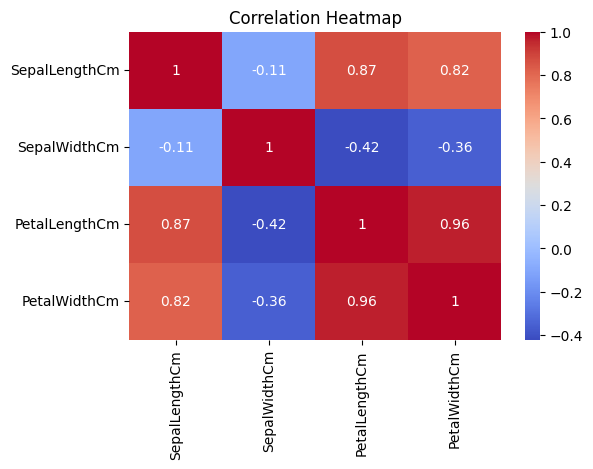

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



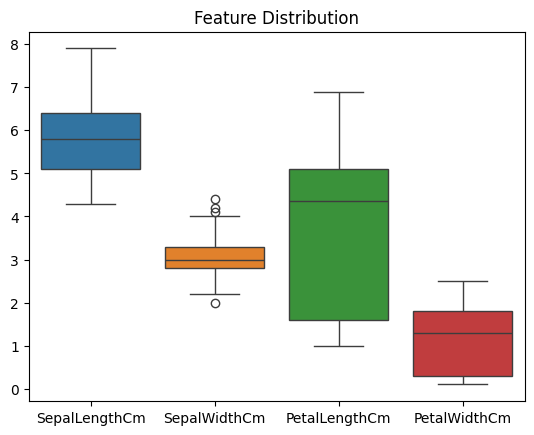

In [9]:
sns.boxplot(data=df)
plt.title("Feature Distribution")
plt.show()

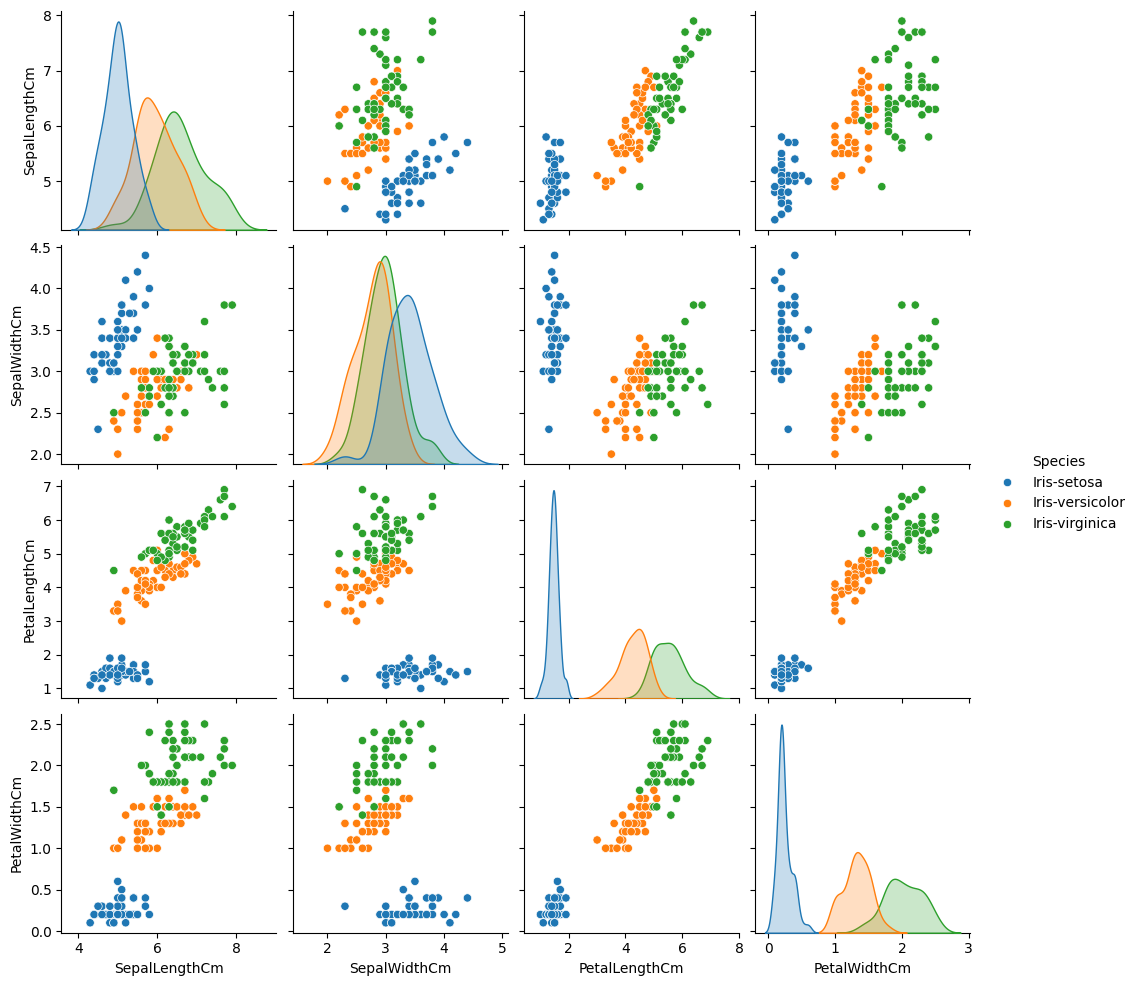

In [10]:
sns.pairplot(df, hue='Species')
plt.show()

In [11]:
X = df.drop('Species', axis=1)
y = df['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



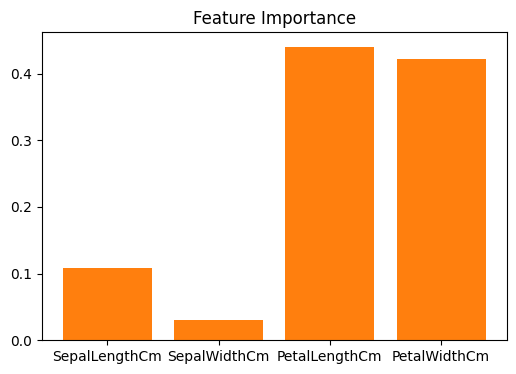

In [16]:
importances = rf.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(X.columns, importances)
plt.bar(X.columns, importances)
plt.title("Feature Importance")
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



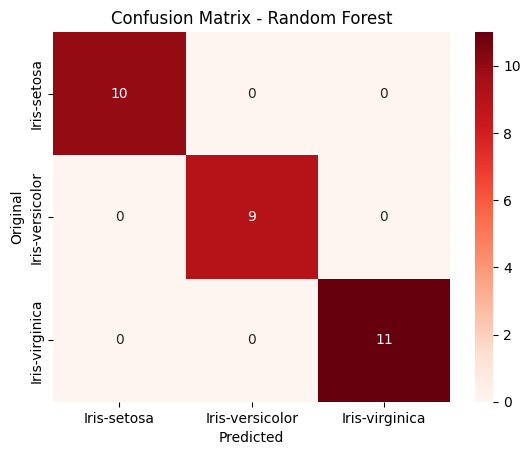

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=y.unique(),
            yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

## MODEL INTERPRETATION 

In this project, multiple machine learning models were trained to classify iris flower species based on their measurements.
Among the tested models, Random Forest achieved the highest accuracy, indicating that ensemble methods are highly effective for this dataset.

The feature importance analysis shows that petal length and petal width contribute the most to prediction accuracy.
This suggests that petal measurements are more significant than sepal measurements when distinguishing between flower species.

Logistic Regression also produced strong results, which indicates that the dataset has fairly clear class separation.
KNN performed competitively but is sensitive to the choice of neighbors and scaling.



## KEY LEARNINGS

Through this project, several important machine learning concepts were applied and understood:


* Data preprocessing and cleaning
* Exploratory data visualization
* Train–test splitting for unbiased evaluation
* Model training using different algorithms
* Performance comparison and evaluation metrics
* Feature importance analysis


This project provided practical experience in building a complete classification pipeline from raw data to model evaluation.

## CONCLUSION

This project demonstrates how machine learning techniques can be effectively applied to solve a multi-class classification problem using the Iris dataset. By performing data exploration, visualization, preprocessing, and model training, meaningful insights were obtained about how different flower measurements influence species prediction.

Among the evaluated algorithms, Random Forest delivered the most reliable performance, highlighting the strength of ensemble learning methods in handling classification tasks with high accuracy and stability. The feature importance analysis further revealed that petal length and petal width are the most decisive attributes, proving that not all features contribute equally to predictions.

Beyond model accuracy, this project provided practical exposure to the complete machine learning workflow — from understanding raw data to evaluating and interpreting model results. It emphasizes the importance of visualization, proper data splitting, and comparison of multiple algorithms before selecting a final model.

In future work, the model could be enhanced through hyperparameter tuning, cross-validation, or deployment as a simple prediction application. Overall, this project strengthened foundational knowledge in supervised learning and demonstrated how data-driven approaches can transform simple measurements into accurate predictive insights.